In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn import metrics
%matplotlib inline

In [2]:
from numpy.random import randn

In [3]:
from scipy import stats
import seaborn as sns

In [4]:
df = pd.read_csv('listings.csv')

C:\Users\eamaumr\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3943387,https://www.airbnb.com/rooms/3943387,20160702172621,2016-07-02,Cozy City Island Room/Private Bath,Private area on 3rd floor of quaint City Islan...,City Island is a small community at the edge o...,Private area on 3rd floor of quaint City Islan...,none,NaN,...,9.0,f,NaN,NaN,f,moderate,f,f,1,0.75
1,6627449,https://www.airbnb.com/rooms/6627449,20160702172621,2016-07-03,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,9.0,f,NaN,NaN,f,flexible,f,f,1,0.82


In [6]:
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)
df.price.head(5)

0     65.0
1    125.0
2     79.0
3    300.0
4     59.0
Name: price, dtype: float64

### Matrix plot is generated to see the relation between all the columns within each other and also its relation with price

In [7]:
reviews_column = ['price','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']

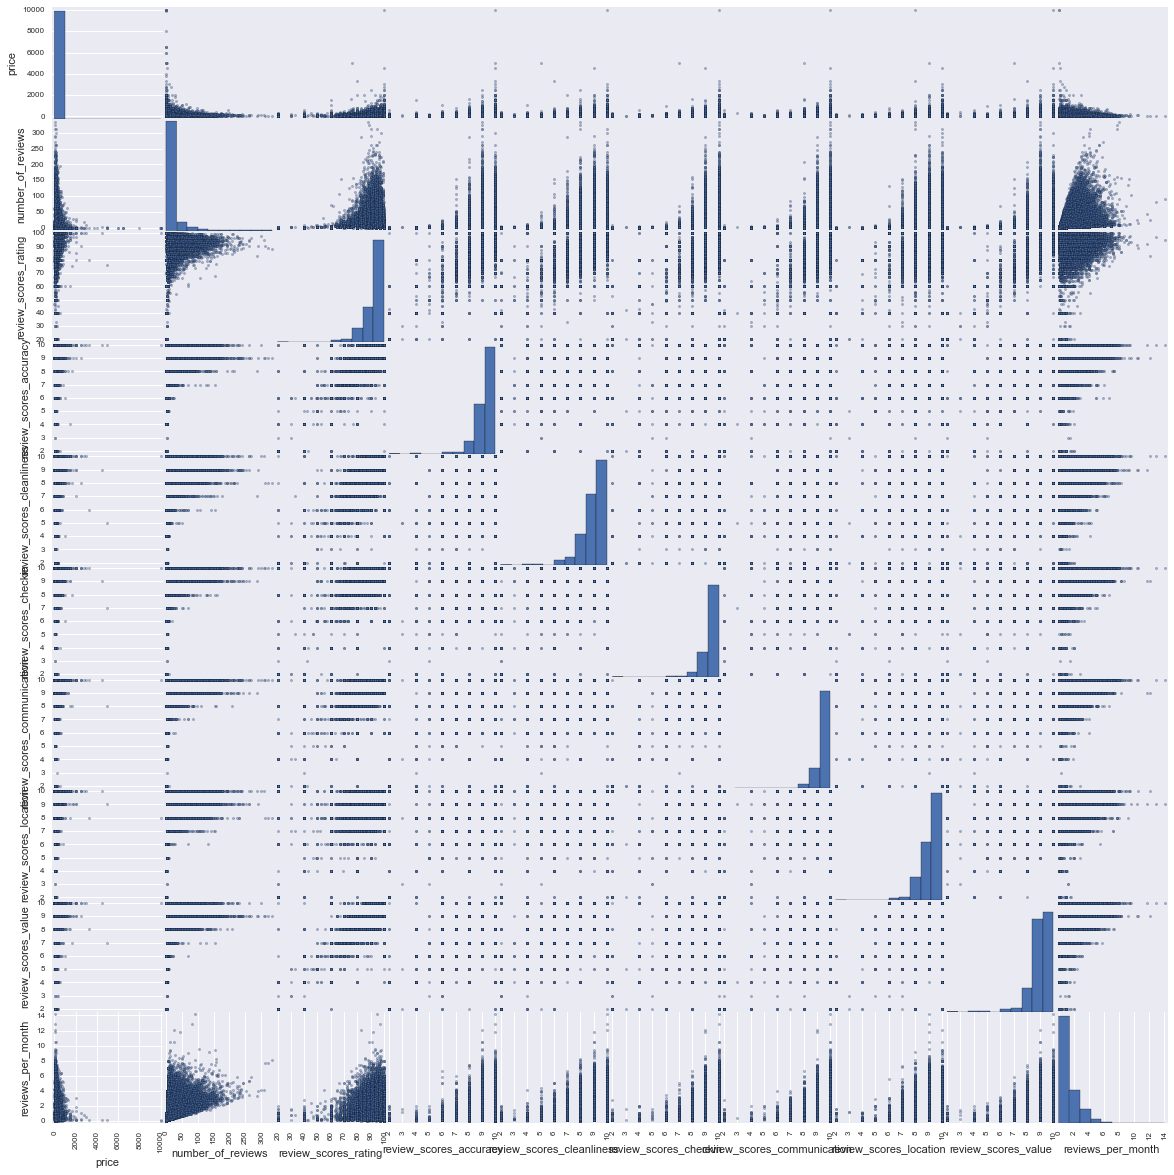

In [8]:
scatter_plots = pd.scatter_matrix(df[reviews_column],figsize=(20,20))

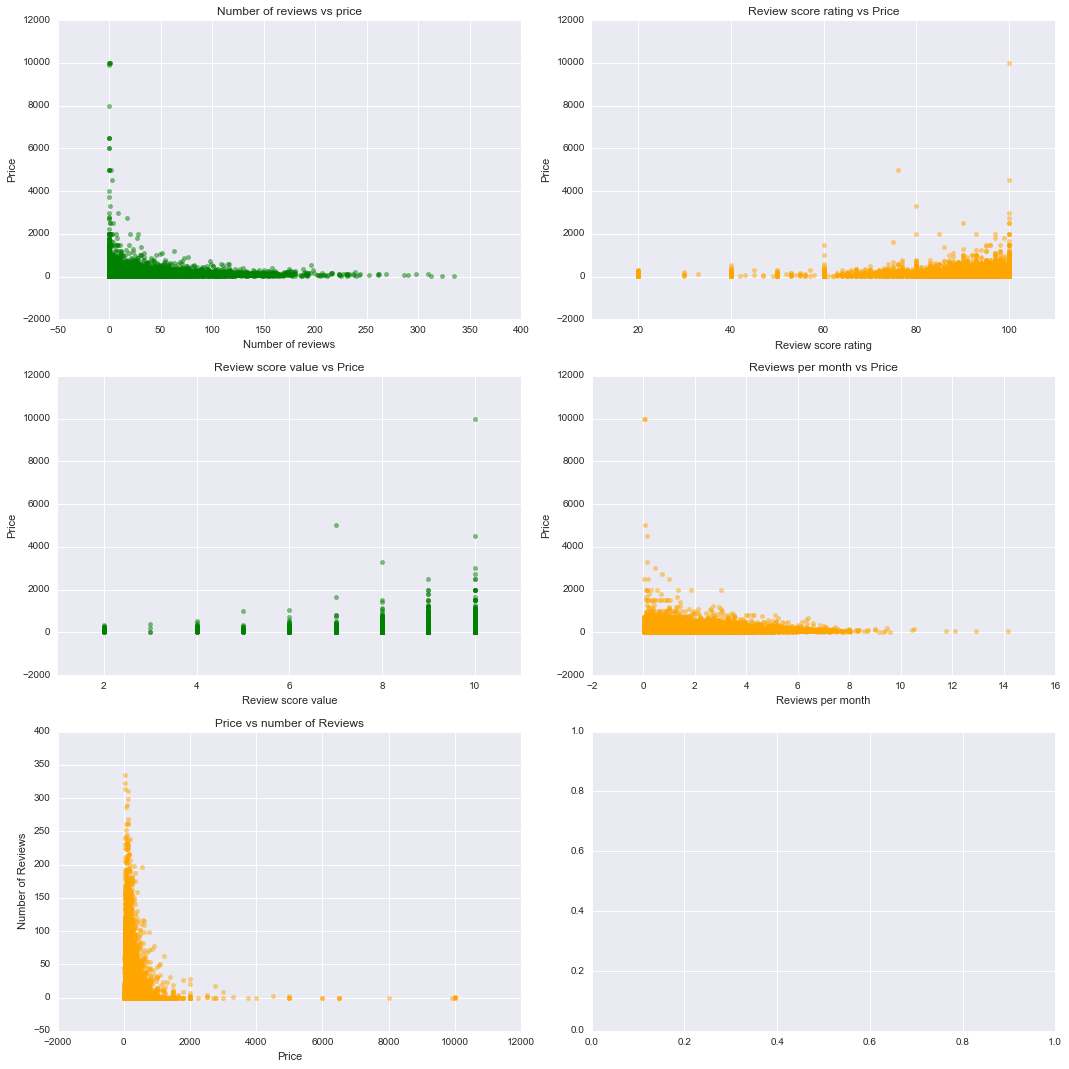

In [9]:
#function for plotting scatter plots
def plot_scatter(x,y, title, x_label, y_label, face, axes):
    
    axes.scatter(x,y,color=face,alpha=0.5)

    
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    
    
    
    return axes
    
#plot histograms for each marker and each demographics
#in the following, instead of adding one subplot to a 4x2 grid at a time
#I can get all the subplot axes for the grid in one line 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))
ax1 = plot_scatter(df.number_of_reviews,df.price,
                'Number of reviews vs price', 
                'Number of reviews', 'Price',
                'green', 
                ax1)

ax2 = plot_scatter(df.review_scores_rating,df.price,
                'Review score rating vs Price', 
                'Review score rating', 'Price',
                'orange', 
                ax2)

ax3 = plot_scatter(df.review_scores_value,df.price,
                'Review score value vs Price', 
                'Review score value', 'Price', 
                'green', 
                ax3)

ax4 = plot_scatter(df.reviews_per_month,df.price,
                'Reviews per month vs Price', 
                'Reviews per month', 'Price',
                'orange', 
                ax4)

ax5 = plot_scatter(df.price,df.number_of_reviews,
                'Price vs number of Reviews', 
                'Price','Number of Reviews',
                'orange', ax5)



plt.tight_layout()
plt.show()

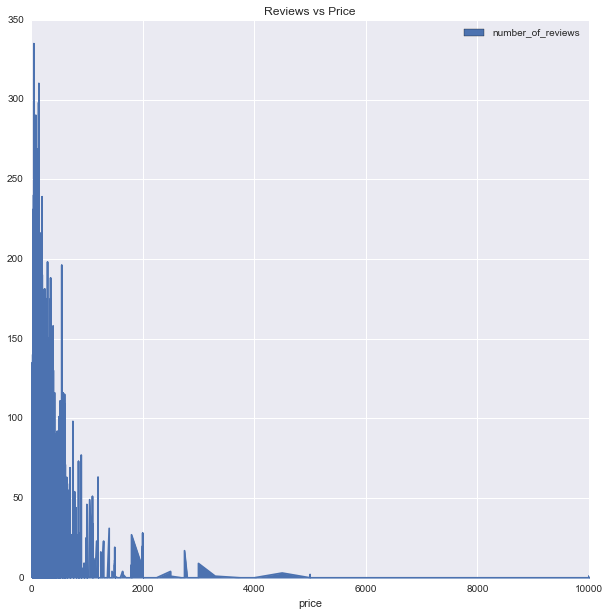

In [10]:
price_review = df[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', y = 'number_of_reviews', figsize =(10,10), kind = 'area', title = 'Reviews vs Price', xlim=0,ylim=0)

### It can be seen from the area curve that there are more reviewsfor price less that $1500

In [11]:
df.cancellation_policy.value_counts(0)

strict             16401
flexible           13274
moderate            9125
super_strict_30        6
no_refunds             2
super_strict_60        1
long_term              1
Name: cancellation_policy, dtype: int64

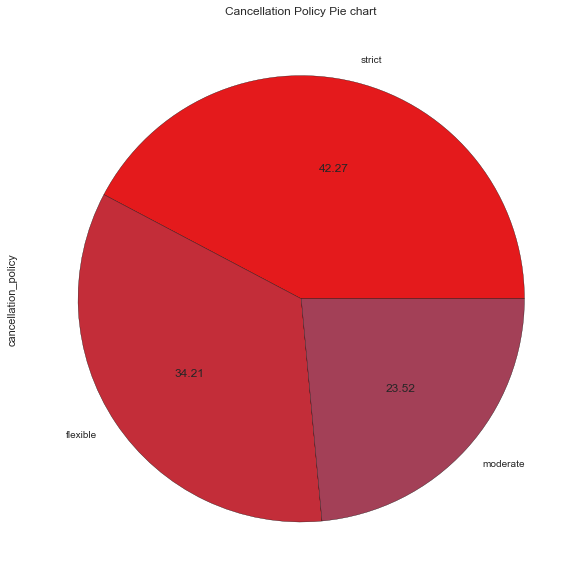

In [25]:
from collections import Counter
from matplotlib import cm
cancel_type = df.cancellation_policy.value_counts(0)
cancel_type = cancel_type.drop(cancel_type["super_strict_30":"long_term"].index)
a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)
cancel_type.plot.pie(colors=cs,
                   figsize=(10,10), 
                   autopct = '%.2f',
                   title = "Cancellation Policy Pie chart")

In [14]:
type(cancel_type)

pandas.core.series.Series

In [23]:
cancel_type = cancel_type.drop(cancel_type["super_strict_30":"long_term"].index)

In [24]:
cancel_type

strict      16401
flexible    13274
moderate     9125
Name: cancellation_policy, dtype: int64